# agricultural classification

In [47]:
import tensorflow as tf
import pandas as pd 
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt 
import pathlib 
import random

In [48]:
path = 'C:/Users/Asus/veri_manipülasyonu/Dataset_BUSI_with_GT'
data_dir = pathlib.Path(path)

In [49]:
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['benign', 'malignant', 'normal'], dtype='<U9')

In [50]:
benignPath = os.path.join(data_dir,'bening')
malignantPath = os.path.join(data_dir,'malignant')
normalPath = os.path.join(data_dir,'normal')

In [51]:
imageCount = len(list(data_dir.glob('*/*.png')))
imageCount

1578

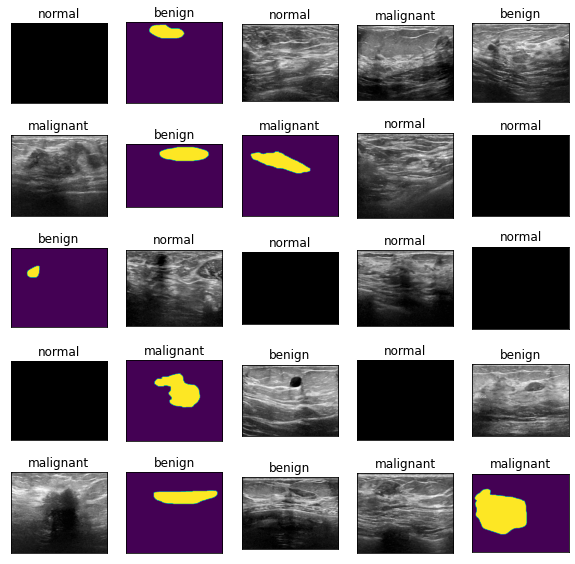

In [53]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    random_class = random.choice(class_names)
    img = plt.imread(random.choice(list(data_dir.glob(random_class+"/*.png"))))
    plt.xticks([])
    plt.yticks([])
    plt.title(random_class)
    plt.imshow(img)

In [54]:
batch_size = 32
img_height = 224
img_width = 224

In [55]:
from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(
                  data_dir,
                  validation_split=0.2,
                  subset="training",
                  seed=123,
                  image_size=(img_height, img_width),
                  batch_size=batch_size)


val_data = image_dataset_from_directory(data_dir,
                                        validation_split=0.2,
                                        subset="validation",
                                        seed=123,
                                        image_size=(img_height,img_width),
                                        batch_size=batch_size)

Found 1578 files belonging to 3 classes.
Using 1263 files for training.
Found 1578 files belonging to 3 classes.
Using 315 files for validation.


In [59]:
from tensorflow.keras import layers 
model = tf.keras.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(3,activation="softmax")
])

In [60]:
model.compile(optimizer="Adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=["accuracy"])

In [61]:
epochs = 10
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data, 
                    batch_size=batch_size)

Epoch 1/10
40/40 [==============================] - 41s 1s/step - loss: 0.9574 - accuracy: 0.5519 - val_loss: 0.8533 - val_accuracy: 0.5810
Epoch 2/10
40/40 [==============================] - 45s 1s/step - loss: 0.6991 - accuracy: 0.6849 - val_loss: 0.7058 - val_accuracy: 0.6984
Epoch 3/10
40/40 [==============================] - 43s 1s/step - loss: 0.5301 - accuracy: 0.7823 - val_loss: 0.7491 - val_accuracy: 0.7270
Epoch 4/10
40/40 [==============================] - 42s 1s/step - loss: 0.3853 - accuracy: 0.8472 - val_loss: 0.8819 - val_accuracy: 0.7206
Epoch 5/10
40/40 [==============================] - 42s 1s/step - loss: 0.2830 - accuracy: 0.8876 - val_loss: 0.9671 - val_accuracy: 0.7492
Epoch 6/10
40/40 [==============================] - 42s 1s/step - loss: 0.2408 - accuracy: 0.9145 - val_loss: 0.9871 - val_accuracy: 0.7143
Epoch 7/10
40/40 [==============================] - 44s 1s/step - loss: 0.1769 - accuracy: 0.9343 - val_loss: 1.0175 - val_accuracy: 0.7619
Epoch 8/10
40/40 [==

In [62]:
model.evaluate(val_data)

10/10 [==============================] - 3s 265ms/step - loss: 1.2964 - accuracy: 0.7492


[1.2963541746139526, 0.7492063641548157]

In [63]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

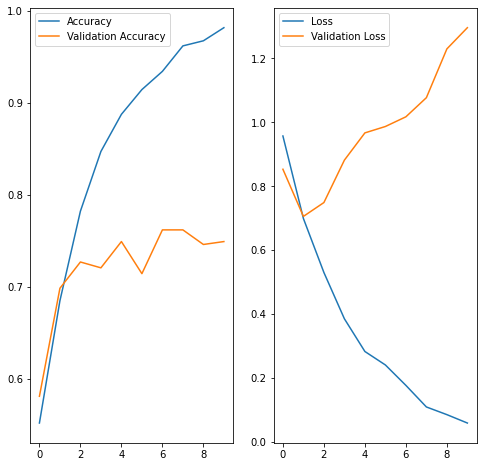

In [64]:
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()

In [65]:
epochs = 2
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data, 
                    batch_size=batch_size)

Epoch 1/2
40/40 [==============================] - 43s 1s/step - loss: 0.0597 - accuracy: 0.9778 - val_loss: 1.3988 - val_accuracy: 0.7556
Epoch 2/2
40/40 [==============================] - 43s 1s/step - loss: 0.0347 - accuracy: 0.9905 - val_loss: 1.4755 - val_accuracy: 0.7460


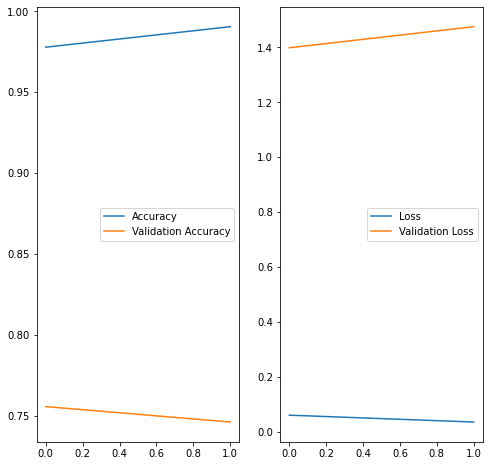

In [66]:
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)       

# predictions

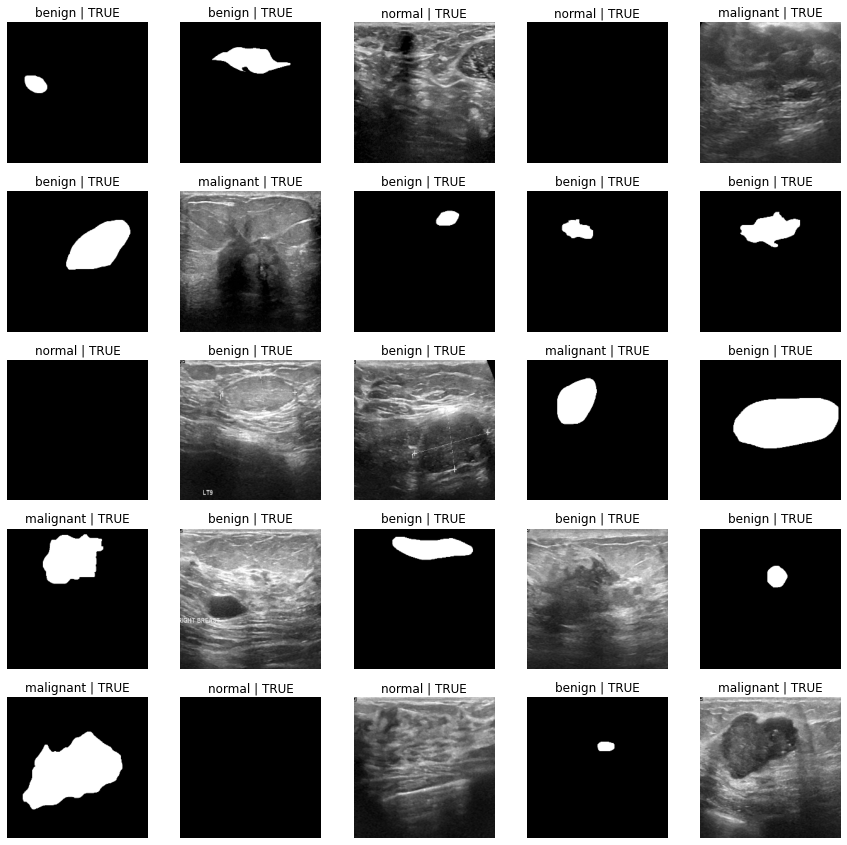

In [68]:
plt.figure(figsize=(15, 15))
class_names = val_data.class_names
result = ' | False'
for images, labels in val_data.take(1):
    for i in range(25):
        
        ax = plt.subplot(5, 5, i + 1)
        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'
            
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_class]+result  )
        plt.axis("off")

<module 'tensorflow._api.v2.version' from 'D:\\spyde\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>